In [28]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [29]:
PATH = 'crop_recommendation.csv'
df = pd.read_csv(PATH)

In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [31]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [32]:
df.size

17600

In [33]:
df.shape

(2200, 8)

In [34]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [35]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [36]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [37]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [38]:
acc = []
model = []

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.18,random_state =2)

In [40]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        17
        jute       0.79      1.00      0.88        22
 kidneybeans       0.00      0.00      0.00        11
      lentil       0.68      1.00      0.81        19
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        23
   mothbeans       0.00      0.00      0.00        16
    mungbean       0.88      1.00      0.94        23
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00 

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [43]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [44]:
# from sklearn.svm import SVC

# SVM = SVC(gamma='auto')

# SVM.fit(Xtrain,Ytrain)

# predicted_values = SVM.predict(Xtest)

# x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
# model.append('SVM')
# print("SVM's Accuracy is: ", x)

# print(classification_report(Ytest,predicted_values))

In [45]:
# score = cross_val_score(SVM,features,target,cv=5)
# score

In [46]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9570707070707071
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        17
        jute       0.88      0.95      0.91        22
 kidneybeans       1.00      1.00      1.00        11
      lentil       0.90      1.00      0.95        19
       maize       0.88      0.83      0.86        18
       mango       0.96      1.00      0.98        23
   mothbeans       0.82      0.88      0.85        16
    mungbean       1.00      0.96      0.98        23
   muskmelon       1.00      1.00      1.00        22
      orange       1.00   

In [47]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [48]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9949494949494949
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        17
        jute       0.95      0.95      0.95        22
 kidneybeans       1.00      1.00      1.00        11
      lentil       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00

In [49]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

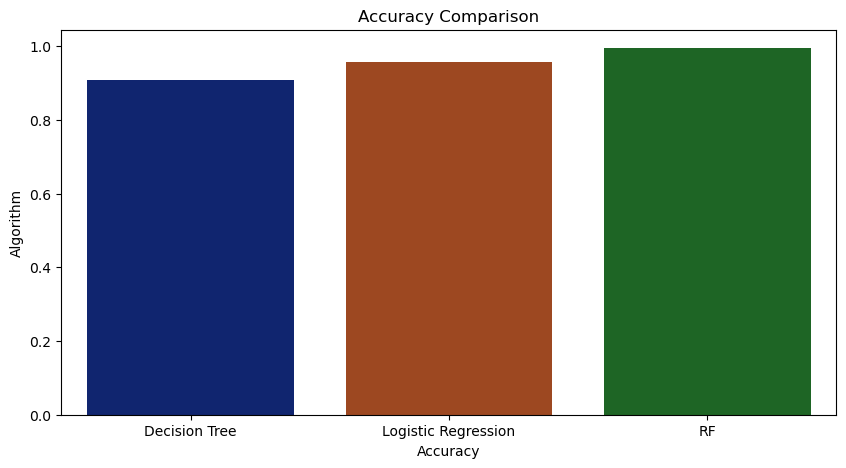

In [50]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = model,y = acc,palette='dark')